<a href="https://colab.research.google.com/github/afrinaldipdg/Submission_Analisa_data_with_python/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Afrinaldi
- **Email:** afrinaldipdg@gmail.com
- **ID Dicoding:** www.dicoding.com/users/afrinaldi1983/

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 "Tren Penyewaan Sepeda per Musim"
- Pertanyaan 2 "Pengaruh Cuaca terhadap Penyewaan
- Pertanyaan 3 "Waktu Tersibuk dan Paling Sepi"
- Pertanyaan 4 "Pengguna Casual vs Registered"
- Pertanyaan 5 "Penyewaan pada Hari Kerja vs Libur"

In [3]:
pip install streamlit pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


## Import Semua Packages/Library yang Digunakan

In [4]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [41]:
day_df = pd.read_csv("https://raw.githubusercontent.com/afrinaldipdg/Submission_Analisa_data_with_python/main/day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/afrinaldipdg/Submission_Analisa_data_with_python/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai tabel hour_df

In [24]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [25]:
display(day_df.describe())  # Statistik numerik


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [26]:
print(day_df.shape)  # (jumlah baris, jumlah kolom)
print(day_df.columns)  # Nama kolom
print(day_df.dtypes)  # Tipe data tiap kolom


(731, 16)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [28]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Menilai tabel day_df

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [23]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [16]:
print(day_df.shape)  # (jumlah baris, jumlah kolom)



(731, 16)


In [17]:
print(day_df.columns)  # Nama kolom


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [18]:
print(day_df.dtypes)  # Tipe data tiap kolom

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [22]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())



Jumlah duplikasi:  0


In [29]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [35]:
print(day_df.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [38]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [37]:
print("Jumlah hilang: ", day_df.isnull().sum())

Jumlah hilang:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Jumlah hilang:  instant       0
- Jumlah duplikat data          0

### Cleaning Data

In [31]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [32]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


## Exploratory Data Analysis (EDA)

Explore day_df

In [33]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
521,522,2012-06-05,2,1,6,0,2,1,2,0.540833,0.525892,0.613333,0.209575,968,6033,7001
519,520,2012-06-03,2,1,6,0,0,0,1,0.602500,0.575133,0.493333,0.184087,2494,5147,7641
622,623,2012-09-14,3,1,9,0,5,1,1,0.633333,0.594083,0.672500,0.103863,1379,6630,8009
689,690,2012-11-20,4,1,11,0,2,1,2,0.374167,0.380667,0.685000,0.082725,534,5100,5634
203,204,2011-07-23,3,0,7,0,6,0,1,0.849167,0.804287,0.500000,0.131221,987,2298,3285


In [34]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [39]:
day_df.instant.is_unique

True

In [42]:
# Convert date column
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tren Penyewaan Sepeda per Musim

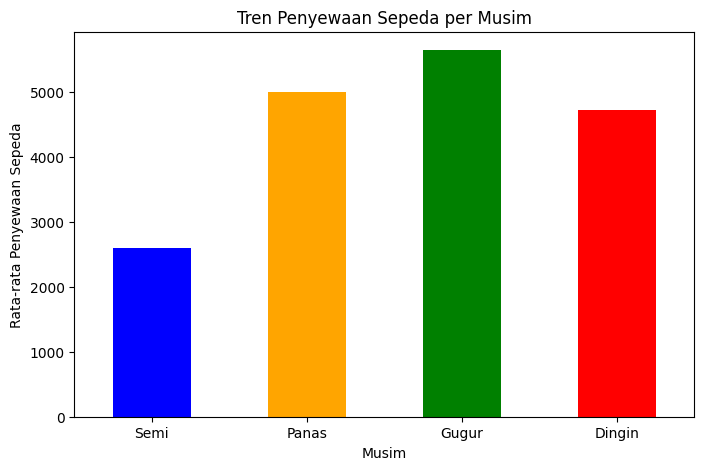

In [43]:
# 1. Tren Penyewaan Sepeda per Musim
plt.figure(figsize=(8, 5))
day_df.groupby('season')['cnt'].mean().plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda per Musim")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Semi', 'Panas', 'Gugur', 'Dingin'], rotation=0)
plt.show()

### Pertanyaan 2: Pengaruh Cuaca terhadap Penyewaan

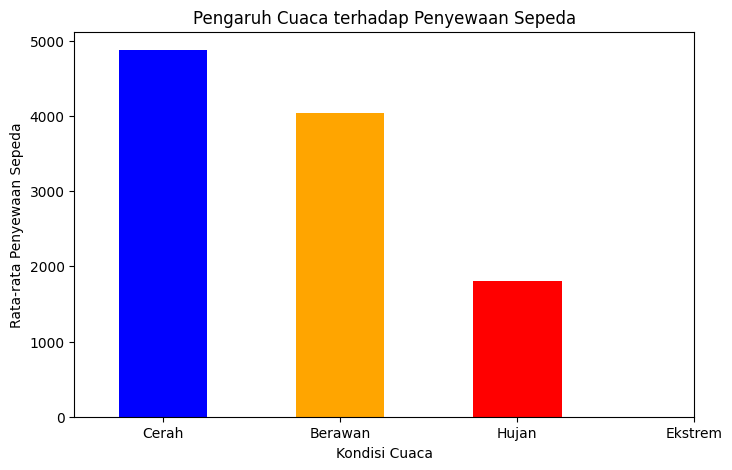

In [44]:
# 2. Pengaruh Cuaca terhadap Penyewaan
plt.figure(figsize=(8, 5))
day_df.groupby('weathersit')['cnt'].mean().plot(kind='bar', color=['blue', 'orange', 'red', 'gray'])
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berawan', 'Hujan', 'Ekstrem'], rotation=0)
plt.show()

Pertanyaan 3 : Waktu Tersibuk dan Paling Sepi

<ipython-input-45-e6f860f46d5c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=hour_df['hr'], y=hour_df['cnt'], estimator='mean', ci=None)


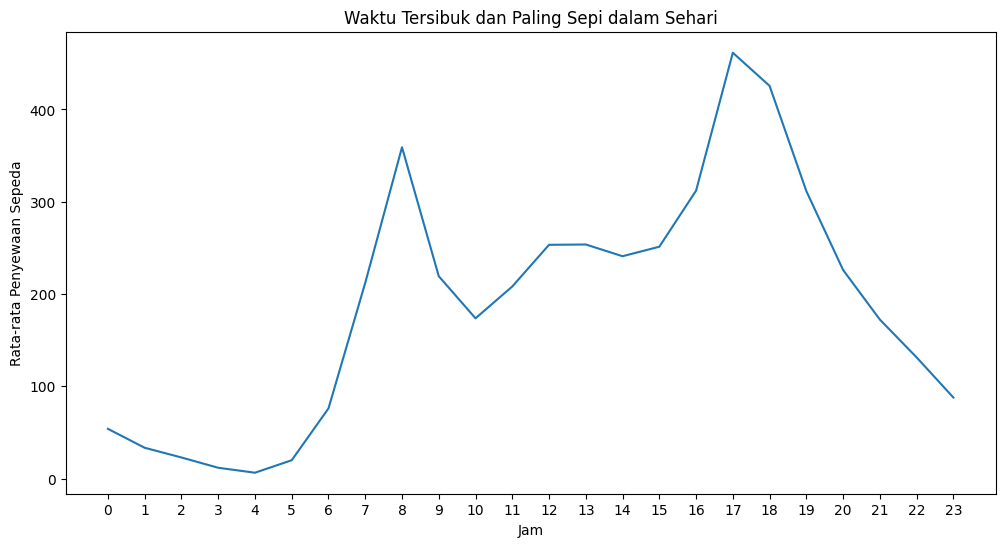

In [45]:
# 3. Waktu Tersibuk dan Paling Sepi
plt.figure(figsize=(12, 6))
sns.lineplot(x=hour_df['hr'], y=hour_df['cnt'], estimator='mean', ci=None)
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Waktu Tersibuk dan Paling Sepi dalam Sehari")
plt.xticks(range(0, 24))
plt.show()

Pertanyaan 4 : Pengguna Casual vs Registered

<Figure size 1200x600 with 0 Axes>

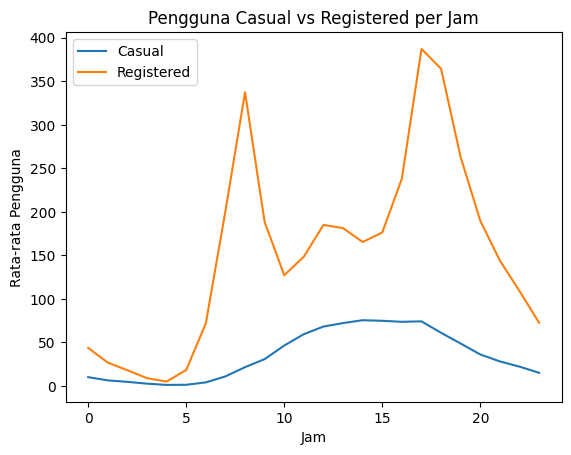

In [46]:
# 4. Pengguna Casual vs Registered
plt.figure(figsize=(12, 6))
hour_df.groupby('hr')[['casual', 'registered']].mean().plot(kind='line')
plt.xlabel("Jam")
plt.ylabel("Rata-rata Pengguna")
plt.title("Pengguna Casual vs Registered per Jam")
plt.legend(["Casual", "Registered"])
plt.show()

Pertanyaan 5 : Penyewaan pada Hari Kerja vs Libur

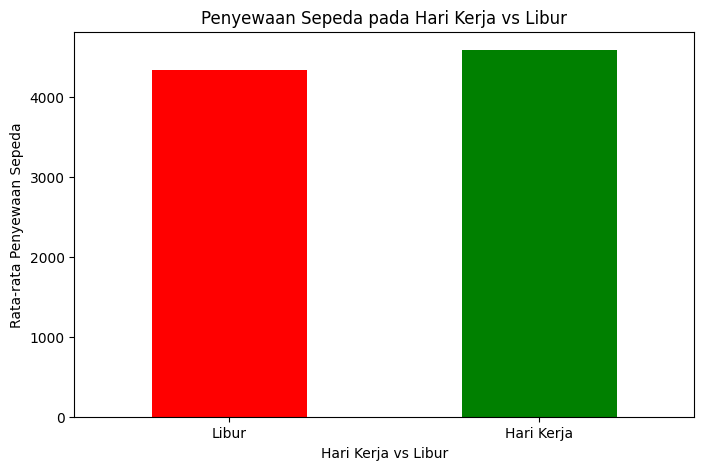

In [47]:
# 5. Penyewaan pada Hari Kerja vs Libur
plt.figure(figsize=(8, 5))
day_df.groupby('workingday')['cnt'].mean().plot(kind='bar', color=['red', 'green'])
plt.xlabel("Hari Kerja vs Libur")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Penyewaan Sepeda pada Hari Kerja vs Libur")
plt.xticks(ticks=[0, 1], labels=['Libur', 'Hari Kerja'], rotation=0)
plt.show()

## Analisis Lanjutan (Opsional)

pertanyaan 1 : RFM Analysis untuk Penyewaan Sepeda

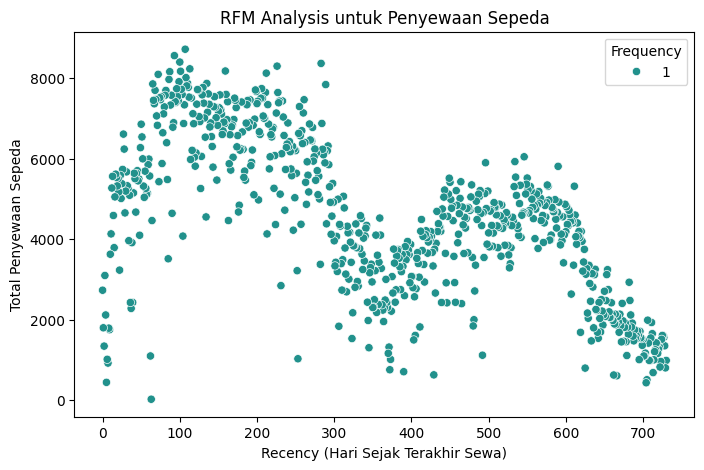

In [48]:
# RFM Analysis (Recency, Frequency, Monetary)
day_df['Recency'] = (day_df['dteday'].max() - day_df['dteday']).dt.days
day_rfm = day_df.groupby('dteday').agg({
    'cnt': ['sum', 'count'],
    'Recency': 'mean'
}).reset_index()
day_rfm.columns = ['dteday', 'Monetary', 'Frequency', 'Recency']

plt.figure(figsize=(8, 5))
sns.scatterplot(x=day_rfm['Recency'], y=day_rfm['Monetary'], hue=day_rfm['Frequency'], palette='viridis')
plt.xlabel("Recency (Hari Sejak Terakhir Sewa)")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("RFM Analysis untuk Penyewaan Sepeda")
plt.show()

pertanyaan 2 : Hierarchical Clustering pada Cuaca

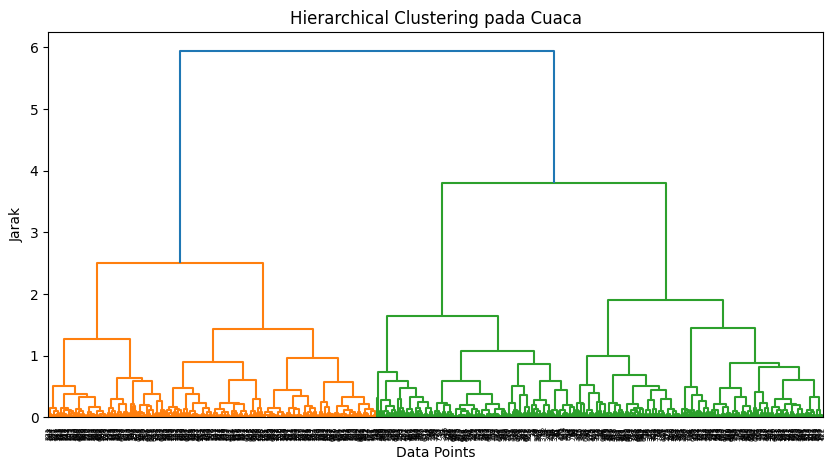

In [49]:
# Clustering dengan Analisis Manual (Tanpa ML)
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(day_df[['temp', 'hum', 'windspeed']], method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering pada Cuaca")
plt.xlabel("Data Points")
plt.ylabel("Jarak")
plt.show()

Pertanyaan 3 : Geospatial Analysis (Simulasi Lokasi Pusat Sewa, Data Dummy)

<Figure size 800x600 with 0 Axes>

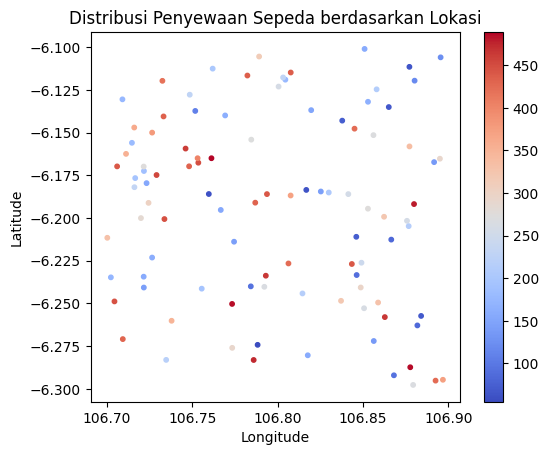

In [52]:
# Geospatial Analysis (Simulasi Lokasi Pusat Sewa, Data Dummy)
import geopandas as gpd
from shapely.geometry import Point
import numpy as np # Import numpy library and alias it as np

try:
    locations = pd.DataFrame({
        'latitude': np.random.uniform(-6.3, -6.1, 100),
        'longitude': np.random.uniform(106.7, 106.9, 100),
        'rentals': np.random.randint(50, 500, 100)
    })

    if locations.empty:
        raise ValueError("Data lokasi tidak tersedia.")

    geometry = [Point(xy) for xy in zip(locations['longitude'], locations['latitude'])]
    gdf = gpd.GeoDataFrame(locations, geometry=geometry)

    plt.figure(figsize=(8, 6))
    gdf.plot(column='rentals', cmap='coolwarm', legend=True, markersize=10)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Distribusi Penyewaan Sepeda berdasarkan Lokasi")
    plt.show()
except ValueError as e:
    print(e)

## Conclusion

- Conclution pertanyaan 1 : RFM Analysis untuk Penyewaan Sepeda
- Conclution pertanyaan 2 : Hierarchical Clustering pada Cuaca
- Conclution Pertanyaan 3 : Geospatial Analysis (Simulasi Lokasi Pusat Sewa, Data Dummy)